In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

medals=pd.read_csv('../data/summerOly_medal_counts.csv')
print(medals.head())

   Rank            NOC  Gold  Silver  Bronze  Total  Year
0     1  United States    11       7       2     20  1896
1     2         Greece    10      18      19     47  1896
2     3        Germany     6       5       2     13  1896
3     4         France     5       4       2     11  1896
4     5  Great Britain     2       3       2      7  1896


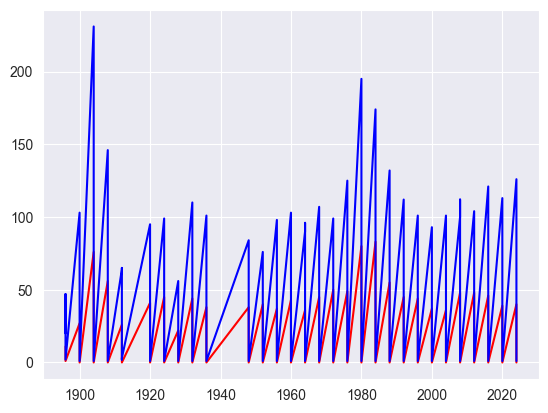

In [5]:
mdf=pd.DataFrame(medals)
plt.plot(mdf['Year'],mdf['Gold'],color='r')
plt.plot(mdf['Year'],mdf['Total'],color='b')

In [4]:
grouped_data10 = mdf.groupby(['NOC'])['Total'].sum().reset_index().sort_values(by='Total',ascending=False)

# Display the first few rows of the grouped data to verify the preprocessing
grouped_data10.head(11)


,NOC,Total
194,United States,2583
70,Great Britain,944
167,Soviet Union,907
62,France,792
34,China,727
66,Germany,680
93,Italy,591
7,Australia,573
97,Japan,508
79,Hungary,494


In [5]:
import seaborn as sns

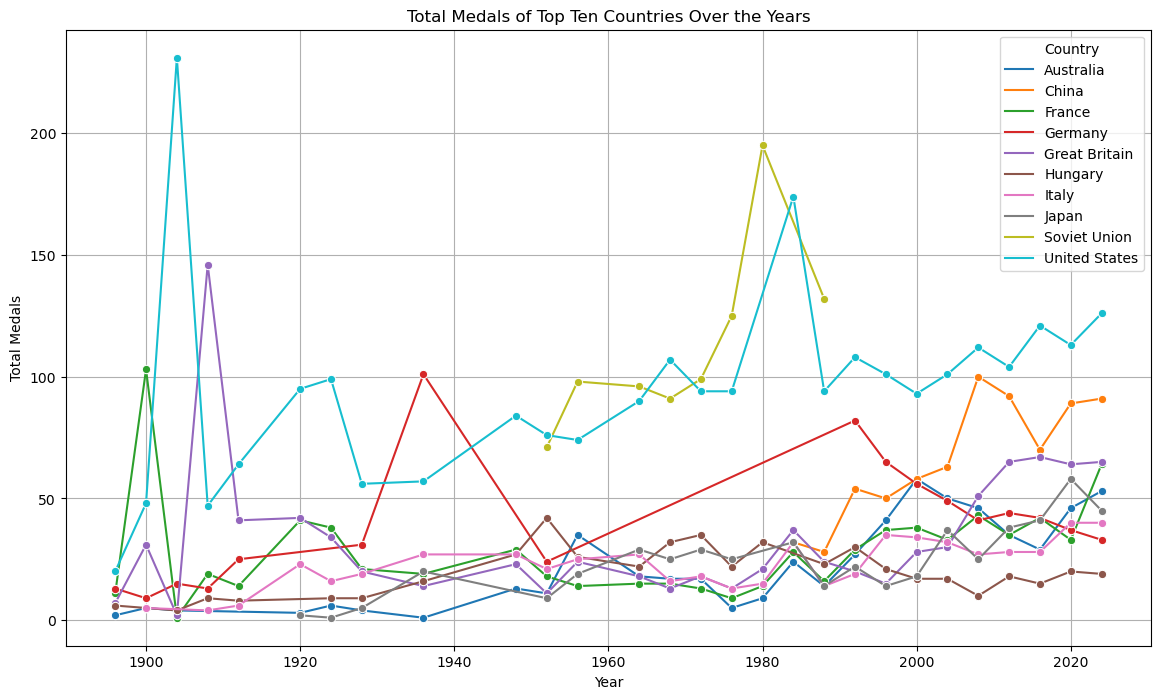

In [6]:
selected_countries=grouped_data10.head(10)['NOC'].tolist()
filtered_data10=mdf[mdf['NOC'].isin(selected_countries)]
grouped_data10 = filtered_data10.groupby(['NOC', 'Year'])['Total'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data10, x='Year', y='Total', hue='NOC', marker='o')

plt.title('Total Medals of Top Ten Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()

C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\3001332817.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Predicted_Total'] = model.predict(X)
C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\3001332817.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Predicted_Total'] = model.predict(X)
C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\3001332817.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Mean Squared Error for United States: 1386.76841781994
Mean Squared Error for Great Britain: 782.6023032633111
Mean Squared Error for Soviet Union: 615.2010763209345
Mean Squared Error for France: 380.7065529202386
Mean Squared Error for China: 132.12479338842974
Mean Squared Error for Germany: 470.7160034980324
Mean Squared Error for Italy: 46.96449900330887
Mean Squared Error for Australia: 108.72914351365147
Mean Squared Error for Japan: 75.5888739680718
Mean Squared Error for Hungary: 79.63910395375244


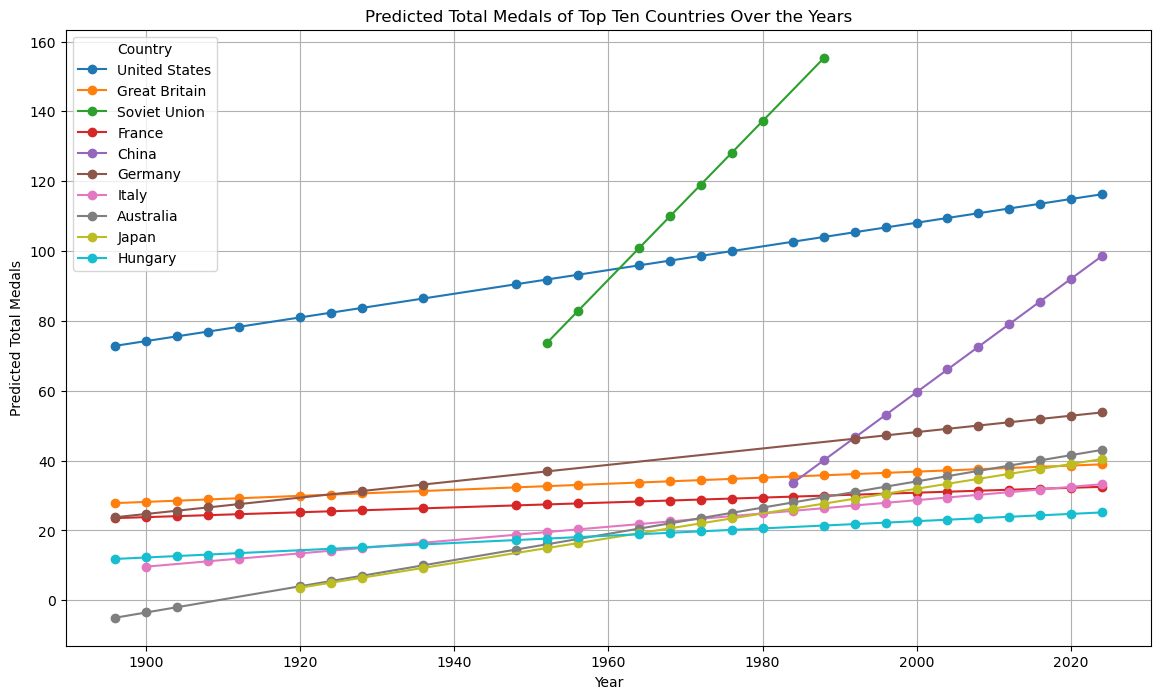

In [7]:
#simple linear regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming mdf is your DataFrame
# Select the top ten countries based on total medals
grouped_data10 = mdf.groupby(['NOC'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
top_countries = grouped_data10.head(10)['NOC'].tolist()

# Filter data for selected countries
filtered_data = mdf[mdf['NOC'].isin(top_countries)]

# Dictionary to store models and predictions
models = {}
predictions = {}

# Train a regression model for each country
for country in top_countries:
    country_data = filtered_data[filtered_data['NOC'] == country]
    X = country_data[['Year']]
    y = country_data['Total']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model
    models[country] = model
    
    # Make predictions
    country_data['Predicted_Total'] = model.predict(X)
    predictions[country] = country_data
    
    # Print Mean Squared Error for each country
    mse = mean_squared_error(y, country_data['Predicted_Total'])
    print(f'Mean Squared Error for {country}:', mse)

# Plotting
plt.figure(figsize=(14, 8))
for country in top_countries:
    country_data = predictions[country]
    plt.plot(country_data['Year'], country_data['Predicted_Total'], marker='o', label=country)

plt.title('Predicted Total Medals of Top Ten Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Predicted Total Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()

C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\4208498232.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Predicted_Total'] = model.predict(X)
C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\4208498232.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Predicted_Total'] = model.predict(X)
C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\4208498232.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

United States - MSE: 1381.58, RMSE: 37.17, R²: 0.12, CV R²: -1.26
Great Britain - MSE: 614.41, RMSE: 24.79, R²: 0.23, CV R²: -8.82
Soviet Union - MSE: 615.19, RMSE: 24.80, R²: 0.52, CV R²: nan
France - MSE: 292.86, RMSE: 17.11, R²: 0.25, CV R²: -0.28
China - MSE: 107.61, RMSE: 10.37, R²: 0.81, CV R²: -5.35
Germany - MSE: 281.87, RMSE: 16.79, R²: 0.53, CV R²: -2.92
Italy - MSE: 46.91, RMSE: 6.85, R²: 0.51, CV R²: -8.30
Australia - MSE: 91.37, RMSE: 9.56, R²: 0.71, CV R²: -1.12
Japan - MSE: 73.67, RMSE: 8.58, R²: 0.64, CV R²: -16.58
Hungary - MSE: 35.73, RMSE: 5.98, R²: 0.63, CV R²: -4.31

Predictions for the year 2028:
United States: 122.80 medals
Great Britain: 69.62 medals
Soviet Union: 243.47 medals
France: 54.71 medals
China: 90.41 medals
Germany: 27.74 medals
Italy: 34.55 medals
Australia: 53.85 medals
Japan: 44.97 medals
Hungary: 10.80 medals


C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\4208498232.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Predicted_Total'] = model.predict(X)
C:\Users\Yuhan Wang\AppData\Local\Temp\ipykernel_16580\4208498232.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Predicted_Total'] = model.predict(X)


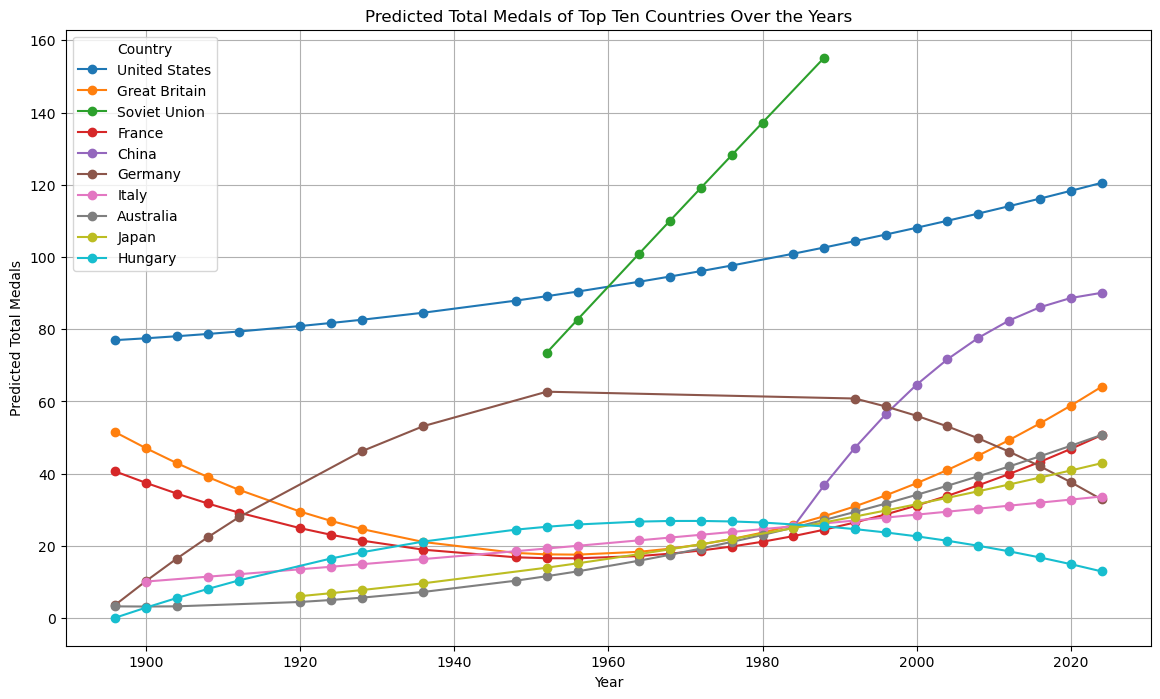

In [8]:
#polynomial regression with predictions for 2028
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Assuming mdf is your DataFrame
# Select the top ten countries based on total medals
grouped_data10 = mdf.groupby(['NOC'])['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
top_countries = grouped_data10.head(10)['NOC'].tolist()

# Filter data for selected countries
filtered_data = mdf[mdf['NOC'].isin(top_countries)]

# Dictionary to store models and predictions
models = {}
predictions = {}
future_predictions = {}

# Train a polynomial regression model for each country
for country in top_countries:
    country_data = filtered_data[filtered_data['NOC'] == country]
    X = country_data[['Year']]
    y = country_data['Total']
    
    # Create a pipeline with polynomial features and linear regression
    degree = 2  # You can experiment with different degrees
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    
    # Store the model
    models[country] = model
    
    # Make predictions
    country_data['Predicted_Total'] = model.predict(X)
    predictions[country] = country_data
    
    # Predict for the year 2028
    future_year = pd.DataFrame({'Year': [2028]})
    future_predictions[country] = model.predict(future_year)[0]
    
    # Calculate and print accuracy metrics for each country
    mse = mean_squared_error(y, country_data['Predicted_Total'])
    rmse = mean_squared_error(y, country_data['Predicted_Total'], squared=False)
    r2 = r2_score(y, country_data['Predicted_Total'])
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'{country} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, CV R²: {cv_scores.mean():.2f}')

# Print predictions for 2028
print("\nPredictions for the year 2028:")
for country, prediction in future_predictions.items():
    print(f'{country}: {prediction:.2f} medals')

# Plotting
plt.figure(figsize=(14, 8))
for country in top_countries:
    country_data = predictions[country]
    plt.plot(country_data['Year'], country_data['Predicted_Total'], marker='o', label=country)

plt.title('Predicted Total Medals of Top Ten Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Predicted Total Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()